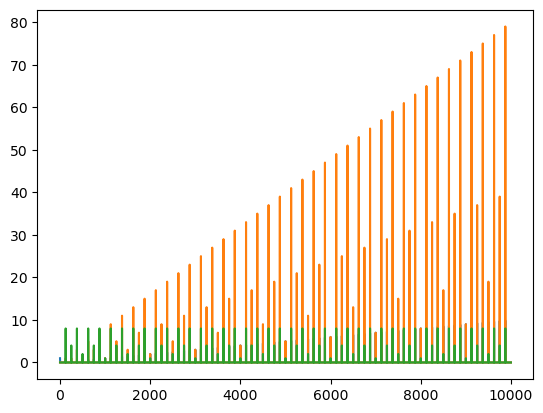

In [1]:
import matplotlib.pyplot as plt


def isq(x, limdigits=2):
    q = x.as_integer_ratio()
    if len(str(q[1])) > limdigits:
        return (False, q[0], q[1])
    return (True, q[0], q[1])

def thomae(x):
    if x == 0:
        return 1, 0, 0
    isxrational = isq(x)
    if isxrational[0]:
        return isxrational[1] / isxrational[2], isxrational[1], isxrational[2]
    return 0, 0, 0


x = list(range(10000))
y = [thomae(n*0.001) for n in range(10000)]
plt.plot(y)
plt.show()

In [2]:
import math

print(math.log(math.pi) * math.e)

3.1116984471984215


In [15]:
# Floyd

def floyd(n=10):
    res = []
    k = 1
    while k < n:
        res += [list(range(int(k*(k-1)/2),int(k*(k+1)/2)))]
        k += 1
    return res

floyd(12)

[[0],
 [1, 2],
 [3, 4, 5],
 [6, 7, 8, 9],
 [10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25, 26, 27],
 [28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44],
 [45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
 [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]]

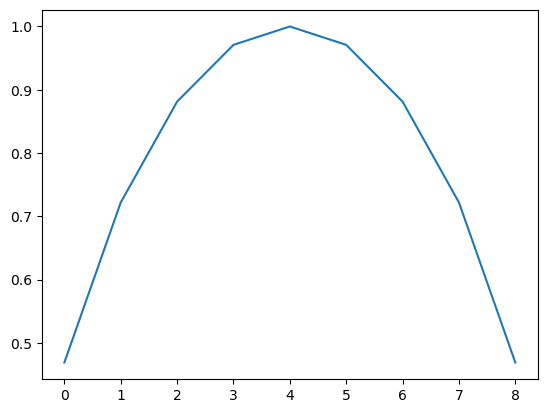

In [26]:
import matplotlib.pyplot as plt
import math

L = 10
plt.plot([-p/L*math.log(p/L, 2) - (1-p/L) * math.log((1-p/L), 2) for p in range(1, 10, 1)])
plt.show()

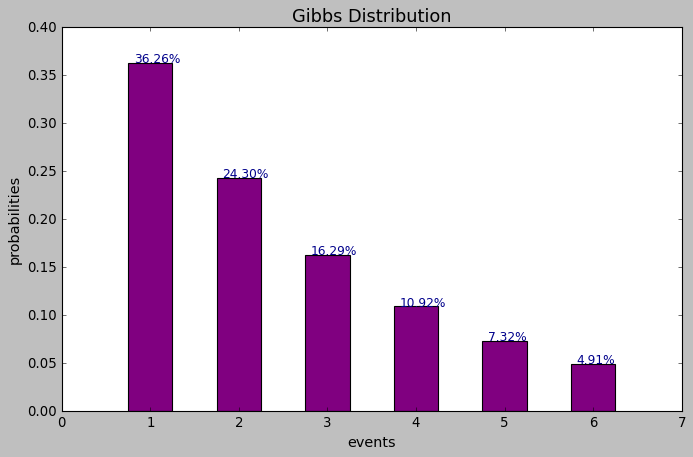

iterations=1: (-0.411,0.109)


In [22]:
from dataclasses import dataclass , field
from itertools import count
import numpy as np
import matplotlib.pyplot as plt


@dataclass
class MaxEnt:
    
    payoffs : np.ndarray
    multiplier : float = field(init = False , default = None)
    
    def partition_function(self, mu: float) -> float:
        return (np.e**(-mu * self.payoffs)).sum()
    
    def gibbs_distr(self, mu : float ) -> np.ndarray:
        partition = self.partition_function( mu )
        return np.e**(-mu * self.payoffs) / partition

    def _trainer(self , mean : float , mu : float) -> float:
        return mean - np.dot( self.payoffs , self.gibbs_distr(mu) )

    def _gradient(self , mu : float ) -> float:
        gibbs = self.gibbs_distr(mu)
        return np.dot( self.payoffs**2 , gibbs ) - np.dot( self.payoffs , gibbs )**2

    def fit(self , mean:float , tolerance : float = 1e-10 , 
                   max_iter : int = 100 , verbose : bool = False ) -> None:
        mu = 0
        counter = count()
        iterations = next(counter)
        while abs(self._trainer(mean , mu)) > tolerance:

            ### Newton-Raphson implementation
            mu = mu - self._trainer(mean , mu)/self._gradient(mu)

            iterations = next(counter)
            if verbose:
                print(f'{iterations=}: ({mu:.3f},{self._trainer(mean,mu):.3f})')

            if iterations > max_iter:
                print("Maximum iterations limit exceeded.")
            break

        ### assigned the trained value to our multiplier attribute
        self.multiplier = mu


def main():
    payoffs = np.arange(1,7,1)
    model = MaxEnt( payoffs )
                
    multiplier = 0.4
    total_events = 6
    
    with plt.style.context('classic'):
        fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (10,6))
        probabilities = model.gibbs_distr(multiplier)
        ax.bar(np.arange(1, total_events+1, 1) , probabilities , width = 0.5 , color = 'purple')
        ax.set_title("Gibbs Distribution" , size = 16)
        ax.set_ylabel("probabilities" , size = 13)
        ax.set_xlabel("events" , size = 13)
        for i , patch in enumerate(ax.patches):
            ax.annotate(text = f'{probabilities[i]*100:.2f}%' , 
                        xy = (patch.get_x() + patch.get_width()/8 , probabilities[i]),
                       size = 11,color = 'darkblue')
        plt.show();
        
if __name__ == "__main__": main()

f = lambda i : i #different mappings can also be used, e.g. f = lambda i : i**2
total_events = 6
payoffs = f(np.arange(1,total_events+1,1))
model = MaxEnt(payoffs)
sample_mean = 4.7

model.fit(sample_mean , verbose = True)

[0, 2, 3.141592653589793, 4.1887902047863905, 4.934802200544679, 5.263789013914324, 5.167712780049969, 4.724765970331401, 4.058712126416768, 3.2985089027387064, 2.550164039877345, 1.8841038793898999, 1.335262768854589, 0.9106287547832829, 0.5992645293207919, 0.3814432808233043, 0.23533063035889312, 0.14098110691713897, 0.08214588661112819, 0.04662160103008852, 0.025806891390014047, 0.013949150409020995, 0.007370430945714347, 0.0038106563868521228, 0.0019295743094039218, 0.0009577224088231724, 0.00046630280576761223, 0.000222872124721274, 0.00010463810492484562, 4.8287822738917413e-05, 2.1915353447830197e-05, 9.787139946737361e-06, 4.303069587032943e-06, 1.863467088262139e-06, 7.952054001475505e-07, 3.3452882941089706e-07, 1.3878952462213758e-07, 5.6808287183311744e-08, 2.294842899726985e-08, 9.152230650159558e-09, 3.604730797462497e-09, 1.4025649060732003e-09, 5.392664662608123e-10]


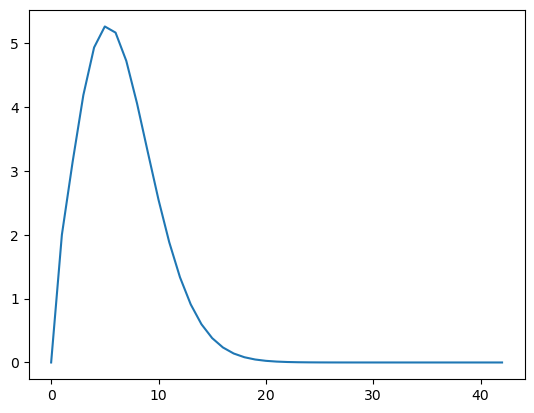

In [4]:
# n-dim space
import math
import matplotlib.pyplot as plt

def cn(n, cn2):
    return 2*math.pi / n * cn2

c = [0, 2, math.pi]
i=3
while i < 42:
    c.append(cn(i, c[i-2]))
    c.append(cn(i+1, c[i-1]))
    i += 2

print(c)
plt.plot(c)
plt.show()

In [40]:
math.exp(1.69), math.log(5.263789013914324)

(5.419480705131206, 1.660851112276426)

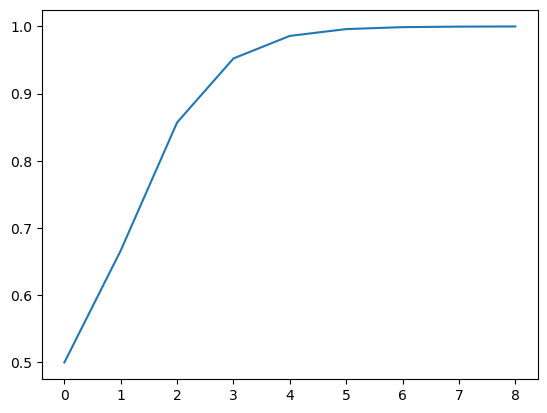

[0.5,
 0.6666666666666666,
 0.8571428571428571,
 0.9523809523809523,
 0.9859154929577465,
 0.9960474308300395,
 0.9989189189189189,
 0.9997087095834547,
 0.9999223059591329]

In [2]:
import math
import matplotlib.pyplot as plt


def ramseyupperbound(p, q):
    return math.comb(p + q - 2, p - 1)

def ramseylowerbound(a):
    n = ramseyupperbound(a, a)
    while math.comb(n, a) - 2**(math.comb(a, 2) - 1) < 0:
        n -= 1
    return n

c = [ramseyupperbound(p, p) / (ramseylowerbound(p) + 1) for p in range(1, 10)]
#d = [ramseylowerbound(a) for a in range(1, 24)]
plt.plot(c)
#plt.plot(d)
plt.show()

c

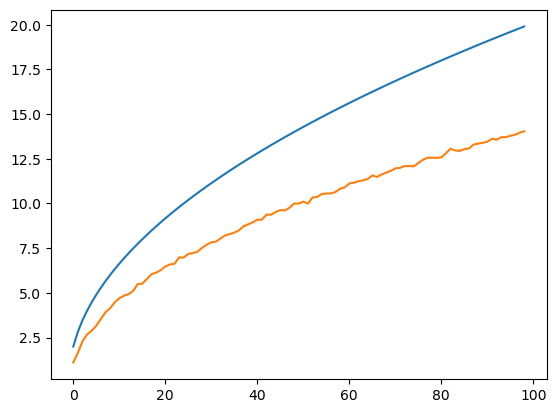

In [7]:
# dimension insensitive Euclidean metric
import numpy as np
import matplotlib.pyplot as plt


dist = []
distmax = []

for dim in range(1, 100):
    a = np.array([1 for n in range(dim)])
    b = np.array([-1 for n in range(dim)])
    dist.append(np.linalg.norm(a - b))
    # simulation: choose n vecs randomly, avrg dist
    dsim = 0
    nsim = 200
    for n in range(nsim):
        #c = np.random.rand(1, dim)
        c = np.random.normal(0, 1.0, dim)
        #d = np.random.rand(1, dim)
        d = np.random.normal(0, 1.0, dim)
        dsim += np.linalg.norm(c - d)
    distmax.append(dsim / nsim)
    

plt.plot(dist)
plt.plot(distmax)
plt.show()

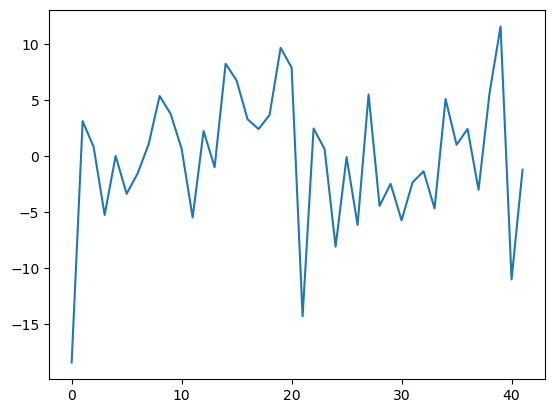

In [36]:
plt.plot([dist[d]*c[d] for d in range(42)])
plt.show()

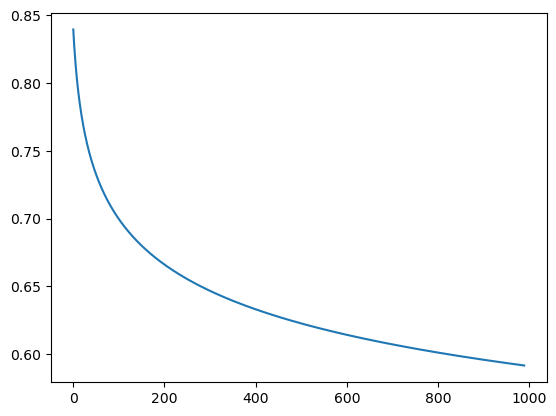

In [41]:
# NN scaling
alpha = 0.076
plt.plot([1/dim**alpha for dim in range(10,1000)])
plt.show()

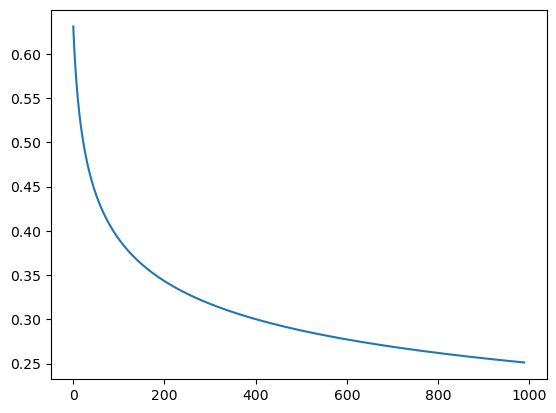

In [47]:
# phys. review 1984 Hausdorff dim: "heuristically shown"
dim = 20
plt.plot([n**(-4/dim) for n in range(10,1000)])
plt.show()

In [1]:
# https://geomstats.github.io/notebooks/08_practical_methods__information_geometry.html

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import geomstats.backend as gs
import geomstats.visualization as visualization

from geomstats.information_geometry.normal import NormalDistributions

normal = NormalDistributions(sample_dim=1)

point_a = gs.array([1.0, 1.0])
point_b = gs.array([3.0, 1.0])

geodesic_ab_fisher = normal.metric.geodesic(point_a, point_b)

n_points = 20
t = gs.linspace(0, 1, n_points)


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
cc = gs.zeros((n_points, 3))
cc[:, 2] = gs.linspace(0, 1, n_points)

visualization.plot(
    geodesic_ab_fisher(t),
    ax=ax,
    space="H2_poincare_half_plane",
    label="point on geodesic",
    color=cc,
)

ax.set_xlim(0.0, 4.0)
ax.set_ylim(0.0, 2.0)
ax.set_title("Geodesic between two normal distributions for the Fisher-Rao metric")
ax.legend()




ModuleNotFoundError: No module named 'geomstats'

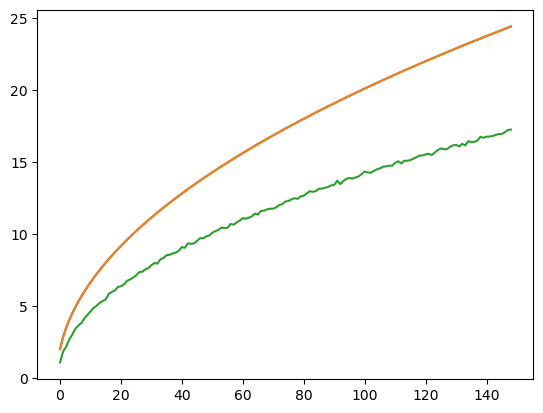

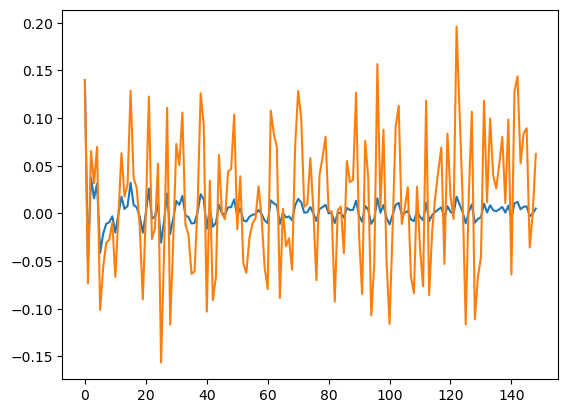

In [93]:
# dimension insensitive Euclidean metric
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm


dist = []
distsqrt = []
distmax = []
distcos = []
distcosc = []
ndim = 150


def cossim(a, b):
    return np.dot(a, b)/(norm(a)*norm(b))


def cossimcorr(a, b):
    return np.dot(a, b)/(norm(a)*norm(b))*(len(a))**0.5  # correct for avrg. length in higher dims (sqrt(ndim))
    

for dim in range(1, ndim):
    a = np.array([1 for n in range(dim)])
    b = np.array([-1 for n in range(dim)])
    dist.append(np.linalg.norm(a - b))

    distsqrt.append(2*math.sqrt(dim))  # max len by dim: sqrt(dim)
    
    # simulation: choose n vecs randomly, avrg dist
    dsim = 0
    dcos = 0
    dcosc = 0
    nsim = 200
    for n in range(nsim):
        #c = np.random.rand(1, dim)
        c = np.random.normal(0, 1.0, dim)
        #d = np.random.rand(1, dim)
        d = np.random.normal(0, 1.0, dim)
        dsim += np.linalg.norm(c - d)
        dcos += cossim(c, d)
        dcosc += cossimcorr(c, d)
    distmax.append(dsim / nsim)
    distcos.append(dcos / nsim)
    distcosc.append(dcosc / nsim)
    

plt.plot(distsqrt)
plt.plot(dist)
plt.plot(distmax)
plt.show()
plt.plot(distcos)
plt.plot(distcosc)
plt.show()

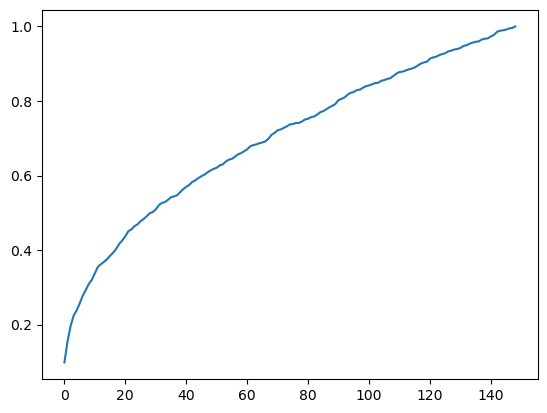

In [23]:
# prob of vectors are 90 deg?
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm


ortho = []
ndim = 150
epsilon = 0.1
ntrials = 500


def cossim(a, b):
    return np.dot(a, b)/(norm(a)*norm(b))
    

orthoctr = 0
for dim in range(1, ndim):
    #epsilon = 0.5 / dim
    for n in range(ntrials):
        a = np.random.normal(0, 1.0, dim)
        b = np.random.normal(0, 1.0, dim)
        if abs(np.dot(a, b)) < epsilon:
            orthoctr += 1
    ortho.append(orthoctr / ntrials)

ortho = [o / max(ortho) for o in ortho]  

plt.plot(ortho)
plt.show()
